# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Фиксируем сиды, что бы у всех был одиннаковый рандом")

Фиксируем сиды, что бы у всех был одиннаковый рандом


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
# your code here
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
# your code here
pd.concat([df_test.head(5), df_test.tail(5)], axis=0)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
# your code here
df_train.describe(include = "all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [7]:
df_test.describe(include = "all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [8]:
# your code here
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

Пропуски есть, у колонок mileage, engine, max_power, torque, seats

In [9]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

В тестовом наборе данных пропуски есть в тех же колонках

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [10]:
len(df_train[df_train.drop(columns=['selling_price']).duplicated()])

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [11]:
df_train[df_train.drop(columns=['selling_price']).duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [12]:
df_train = df_train.drop_duplicates(subset = list(df_train.drop(columns=['selling_price']).columns),
                                    keep = 'first')

In [13]:
df_train.shape

(5840, 13)

In [14]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [15]:
df_train.reset_index(drop = True, inplace = True)

In [16]:
df_train.tail(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5830,Maruti Alto LXi,2011,200000,73000,Petrol,Individual,Manual,First Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0
5831,Maruti 800 AC,1997,40000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
5832,Maruti Alto K10 VXI Airbag,2017,340000,45000,Petrol,Individual,Manual,First Owner,23.95 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5833,Hyundai i20 Magna,2013,380000,25000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5834,Maruti Wagon R LXI Optional,2017,360000,80000,Petrol,Individual,Manual,First Owner,20.51 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
5839,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

Убираем единицы измерения у mileage путем разбииения по пробелу

In [17]:
new_df = df_train['mileage'].str.split(' ',expand=True)
new_df.columns = ['mileage_kmpl','kmpl']
new_df['mileage_kmpl'] = new_df['mileage_kmpl'].astype(float)
del new_df['kmpl']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mileage_kmpl  5654 non-null   float64
dtypes: float64(1)
memory usage: 45.8 KB


In [18]:
df_train = pd.concat([df_train,new_df],axis=1).drop('mileage',axis=1)
df_train.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,mileage_kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00


In [19]:
new_df = df_train['engine'].str.split(' ',expand=True)
new_df.columns = ['engine_CC','CC']
new_df['engine_CC'] = new_df['engine_CC'].astype(float)
del new_df['CC']

df_train = pd.concat([df_train,new_df],axis=1).drop('engine',axis=1)
df_train.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,torque,seats,mileage_kmpl,engine_CC
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,74 bhp,190Nm@ 2000rpm,5.0,23.40,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,1498.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00,1396.0


In [20]:
def change_max_power(x):
    try: return float(str(x).split(' ')[0])
    except ValueError: np.nan

In [21]:
df_train['max_power'] = df_train['max_power'].apply(lambda x: change_max_power(str(x))).astype(float)

In [22]:
df_train.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,torque,seats,mileage_kmpl,engine_CC
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,74.00,190Nm@ 2000rpm,5.0,23.40,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,103.52,250Nm@ 1500-2500rpm,5.0,21.14,1498.0


In [23]:
import re

In [24]:
df_train['torque'].isna().sum()

187

In [25]:
df_train['torque'][5697]

'400Nm'

In [26]:
re.findall('\d+\.*\d*Nm@|\d+\.*\d* kgm|\d+\.*\d*nm@|\d+\.*\d*@|\d+\.*\d*kgm@|\d+\.*\d*Nm|\d+\.*\d* Nm',
           df_train['torque'][5697])

['400Nm']

In [27]:
def to_torque(x):
    try: return re.findall('\d+\.*\d*Nm|\d+\.*\d* kgm|\d+\.*\d*nm|\d+\.*\d*@|\d+\.*\d*kgm|\d+\.*\d*Nm|\d+\.*\d* Nm',
                           x)[0]
    except (TypeError, IndexError): np.nan

In [28]:
df_train['torque'].apply(lambda x: to_torque(x))

0          190Nm
1          250Nm
2       22.4 kgm
3          11.5@
4       113.75nm
          ...   
5835      96.1Nm
5836        90Nm
5837     113.7Nm
5838         24@
5839       190Nm
Name: torque, Length: 5840, dtype: object

In [29]:
df_train['torque'].apply(lambda x: to_torque(x)).isna().sum()

210

In [30]:
def to_max_torque_rpm(x):
    try: return re.findall(r'\d+\.*\d*rpm|\d+\,*\d*\(kgm@ rpm\)|\d+\,*\d* rpm|\d+\.*\d* RPM|\d+\.*\d*  rpm',
                           x)[0]
    except (TypeError, IndexError): np.nan

In [31]:
df_train['torque'][391]

'135 Nm at 2500  rpm '

In [32]:
re.findall(r'\d+\.*\d*rpm|\d+\,*\d*\(kgm@ rpm\)|\d+\,*\d* rpm|\d+\.*\d* RPM|\d+\.*\d*  rpm',
           df_train['torque'][391])

['2500  rpm']

In [33]:
df_train['torque'].apply(lambda x: to_max_torque_rpm(x))

0               2000rpm
1               2500rpm
2               2750rpm
3       4,500(kgm@ rpm)
4               4000rpm
             ...       
5835            3000rpm
5836            3500rpm
5837            4000rpm
5838    2,750(kgm@ rpm)
5839            2000rpm
Name: torque, Length: 5840, dtype: object

In [34]:
df_train['torque'].apply(lambda x: to_max_torque_rpm(x)).isna().sum()

203

In [35]:
df_train['torque_new'] = df_train['torque'].apply(lambda x: to_torque(x))

df_train['max_torque_rpm'] = df_train['torque'].apply(lambda x: to_max_torque_rpm(x))

df_train.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,torque,seats,mileage_kmpl,engine_CC,torque_new,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,74.00,190Nm@ 2000rpm,5.0,23.40,1248.0,190Nm,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,103.52,250Nm@ 1500-2500rpm,5.0,21.14,1498.0,250Nm,2500rpm
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,90.00,22.4 kgm at 1750-2750rpm,5.0,23.00,1396.0,22.4 kgm,2750rpm
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,1298.0,11.5@,"4,500(kgm@ rpm)"
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,81.86,113.75nm@ 4000rpm,5.0,20.14,1197.0,113.75nm,4000rpm
5,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,57.50,"7.8@ 4,500(kgm@ rpm)",5.0,17.30,1061.0,7.8@,"4,500(kgm@ rpm)"
6,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,37.00,59Nm@ 2500rpm,4.0,16.10,796.0,59Nm,2500rpm
7,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,67.10,170Nm@ 1800-2400rpm,5.0,23.59,1364.0,170Nm,2400rpm
8,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,68.10,160Nm@ 2000rpm,5.0,20.00,1399.0,160Nm,2000rpm
9,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,Second Owner,108.45,248Nm@ 2250rpm,5.0,19.01,1461.0,248Nm,2250rpm


In [36]:
def changesmth(x):
    if '@' in str(x):
        x = x.replace("@", "kgm")
    if ' ' in str(x):
        x = x.replace(" ", "")
    x = str(x).lower()
    
    if 'kgm' in str(x):
        n = round(float(re.findall('\d+\.*\d*', str(x))[0])* 9.80665, 2)
        x = f"{n}nm"
        
    x = x.replace("nm", "")
    if 'none' in x:
        x = np.nan
    x = float(x)
    return(x)

In [37]:
df_train['torque_new'] = df_train['torque_new'].apply(lambda x: changesmth(x))

In [38]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,torque,seats,mileage_kmpl,engine_CC,torque_new,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,74.00,190Nm@ 2000rpm,5.0,23.40,1248.0,190.00,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,103.52,250Nm@ 1500-2500rpm,5.0,21.14,1498.0,250.00,2500rpm
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,90.00,22.4 kgm at 1750-2750rpm,5.0,23.00,1396.0,219.67,2750rpm
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,1298.0,112.78,"4,500(kgm@ rpm)"
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,81.86,113.75nm@ 4000rpm,5.0,20.14,1197.0,113.75,4000rpm


In [39]:
def changesmth_2(x):
    try:
        x = re.findall('\d+\,*\d*|\d+\.*\d*', str(x))[0]
        if ',' in x: x = x.replace(',', '')
    except IndexError: x = np.nan 
    return float(x)

In [40]:
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: changesmth_2(x))

In [41]:
del df_train['torque']

In [42]:
df_train.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,seats,mileage_kmpl,engine_CC,torque_new,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,74.00,5.0,23.40,1248.0,190.00,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,103.52,5.0,21.14,1498.0,250.00,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,90.00,5.0,23.00,1396.0,219.67,2750.0


Теперь тест

In [43]:
new_df = df_test['mileage'].str.split(' ',expand=True)
new_df.columns = ['mileage_kmpl','kmpl']
new_df['mileage_kmpl'] = new_df['mileage_kmpl'].astype(float)
del new_df['kmpl']
df_test = pd.concat([df_test,new_df],axis=1).drop('mileage',axis=1)

new_df = df_test['engine'].str.split(' ',expand=True)
new_df.columns = ['engine_CC','CC']
new_df['engine_CC'] = new_df['engine_CC'].astype(float)
del new_df['CC']
df_test = pd.concat([df_test,new_df],axis=1).drop('engine',axis=1)

df_test['max_power'] = df_test['max_power'].apply(lambda x: change_max_power(str(x))).astype(float)

df_test['torque_new'] = df_test['torque'].apply(lambda x: to_torque(x))
df_test['torque_new'] = df_test['torque_new'].apply(lambda x: changesmth(x))

df_test['max_torque_rpm'] = df_test['torque'].apply(lambda x: to_max_torque_rpm(x))
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: changesmth_2(x))
del df_test['torque']

df_test.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,seats,mileage_kmpl,engine_CC,torque_new,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,112.0,7.0,14.00,2498.0,260.0,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,108.5,5.0,21.50,1497.0,260.0,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,130.0,5.0,12.90,1799.0,172.0,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,98.6,5.0,25.10,1498.0,200.0,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,65.0,5.0,16.50,1172.0,NaN,3000.0
5,Mahindra Thar CRDe,2019,975000,12584,Diesel,Dealer,Manual,First Owner,105.0,6.0,16.55,2498.0,247.0,2000.0
6,Chevrolet Spark 1.0 LS,2011,150000,35000,Petrol,Individual,Manual,First Owner,62.0,5.0,18.00,995.0,90.3,4200.0
7,Maruti Ritz ZXi,2012,275000,70000,Petrol,Individual,Manual,Second Owner,85.8,5.0,18.50,1197.0,114.0,4000.0
8,Maruti Alto LX,2011,140000,72000,Petrol,Individual,Manual,Second Owner,46.3,5.0,19.70,796.0,62.0,3000.0
9,Hyundai Creta 1.6 CRDi SX,2016,850000,58000,Diesel,Individual,Manual,First Owner,126.2,5.0,19.67,1582.0,259.9,2750.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [44]:
df_train.isna().sum()

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
max_power         184
seats             186
mileage_kmpl      186
engine_CC         186
torque_new        210
max_torque_rpm    203
dtype: int64

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   max_power       5656 non-null   float64
 9   seats           5654 non-null   float64
 10  mileage_kmpl    5654 non-null   float64
 11  engine_CC       5654 non-null   float64
 12  torque_new      5630 non-null   float64
 13  max_torque_rpm  5637 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


In [46]:
df_train['max_power'] = df_train['max_power'].fillna(df_train['max_power'].median())
df_train['seats'] = df_train['seats'].fillna(df_train['seats'].median())
df_train['mileage_kmpl'] = df_train['mileage_kmpl'].fillna(df_train['mileage_kmpl'].median())
df_train['engine_CC'] = df_train['engine_CC'].fillna(df_train['engine_CC'].median())
df_train['torque_new'] = df_train['torque_new'].fillna(df_train['torque_new'].median())
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].fillna(df_train['max_torque_rpm'].median())

In [47]:
df_train.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
max_power         0
seats             0
mileage_kmpl      0
engine_CC         0
torque_new        0
max_torque_rpm    0
dtype: int64

In [48]:
df_test['max_power'] = df_test['max_power'].fillna(df_train['max_power'].median())
df_test['seats'] = df_test['seats'].fillna(df_train['seats'].median())
df_test['mileage_kmpl'] = df_test['mileage_kmpl'].fillna(df_train['mileage_kmpl'].median())
df_test['engine_CC'] = df_test['engine_CC'].fillna(df_train['engine_CC'].median())
df_test['torque_new'] = df_test['torque_new'].fillna(df_train['torque_new'].median())
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].fillna(df_train['max_torque_rpm'].median())

In [49]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
max_power         0
seats             0
mileage_kmpl      0
engine_CC         0
torque_new        0
max_torque_rpm    0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [50]:
df_train['engine_CC'] = df_train['engine_CC'].astype(int)
df_test['engine_CC'] = df_test['engine_CC'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   max_power       1000 non-null   float64
 9   seats           1000 non-null   int64  
 10  mileage_kmpl    1000 non-null   float64
 11  engine_CC       1000 non-null   int64  
 12  torque_new      1000 non-null   float64
 13  max_torque_rpm  1000 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 109.5+ KB


In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   max_power       5840 non-null   float64
 9   seats           5840 non-null   int64  
 10  mileage_kmpl    5840 non-null   float64
 11  engine_CC       5840 non-null   int64  
 12  torque_new      5840 non-null   float64
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 638.9+ KB


In [53]:
print("<Место для ответа на вопрос про seats>")

<Место для ответа на вопрос про seats>


In [54]:
print("Возможно переменная количества мест будет нелинейно влиять на цену \nНапример, купешки(2 места) обычно стоят дешевле, чем обычные(5мест) \nА вот машины на 7+ могут быть дешевле, а могут и нет" )

Возможно переменная количества мест будет нелинейно влиять на цену 
Например, купешки(2 места) обычно стоят дешевле, чем обычные(5мест) 
А вот машины на 7+ могут быть дешевле, а могут и нет


В таком случае лучше использовать категории

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

In [55]:
import seaborn as sns

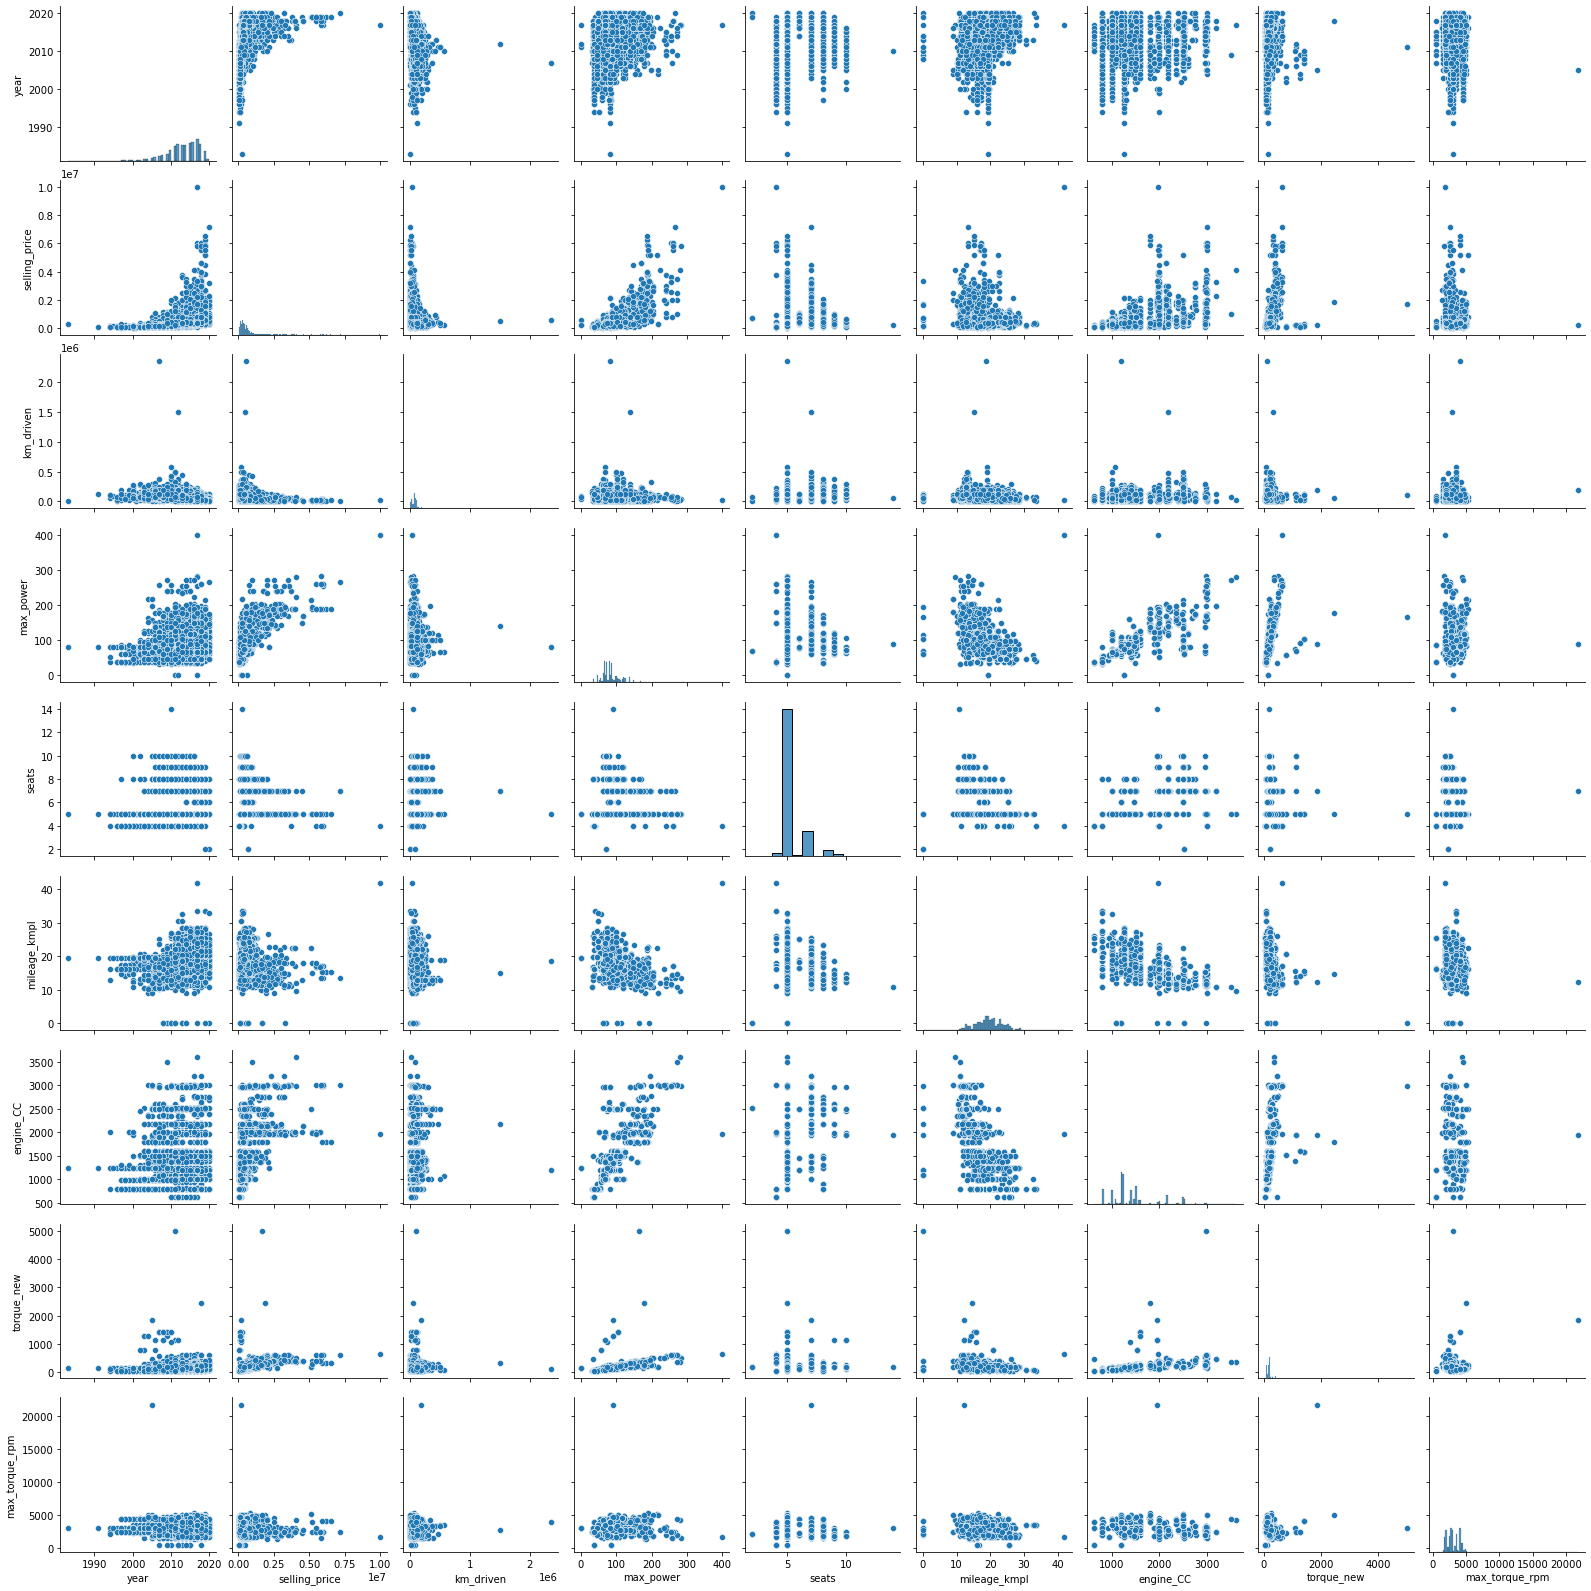

In [56]:
sns.pairplot(df_train.drop(columns=['name']));

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

1) цена и максимальная мощность довольно хорошо линейно коррелируют, чем больше мощность(больше лошадок), тем дороже

2) обьем двигателя тоже линейно зависим с ценой авто, больше capacity, больше цена

3) чем моложе машина, тем дороже

Между собой остальные переменные:
- явно видна зависимость engine и мощности
- явно видна зависимость engine и torque

Теперь смотрим на тест

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

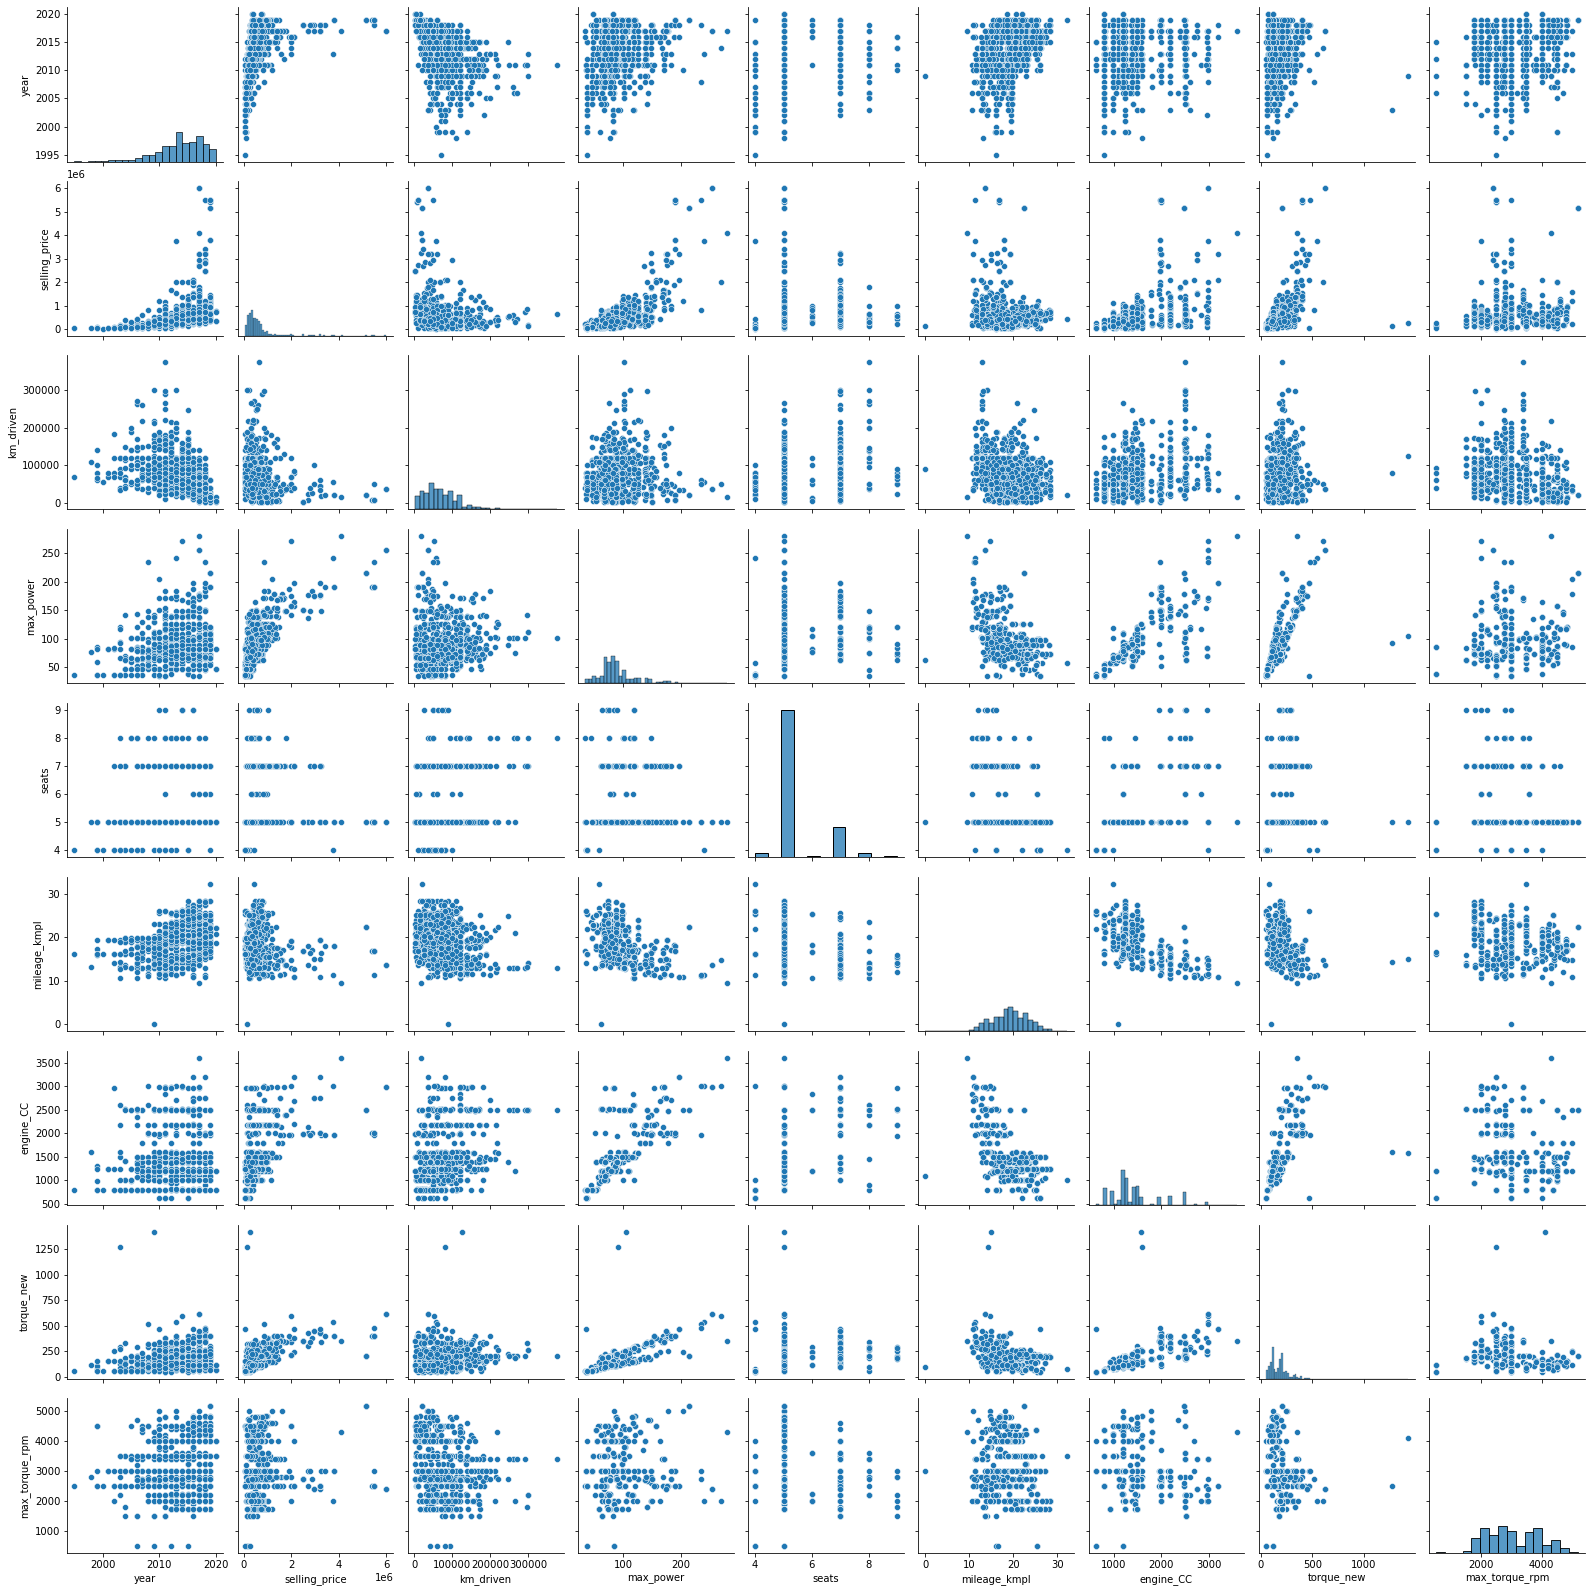

In [57]:
sns.pairplot(df_test.drop(columns=['name']));

Ситуация похожая, но понятное дело меньше значений

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

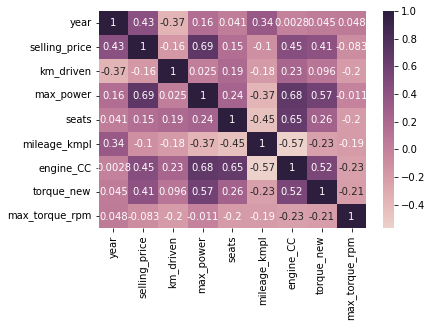

In [58]:
sns.heatmap(df_train[['year', 'selling_price', 'km_driven',
                      'max_power', 'seats', 'mileage_kmpl', 'engine_CC', 'torque_new', 'max_torque_rpm']].corr(),
            cmap=sns.cubehelix_palette(as_cmap=True),
           annot = True);

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

- двигатель и год наименее скоррелированны между собой
- довльно сильно положительно коррелируют между собой макс мошность и цена
- правильно, тк отрицательная корреляция

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

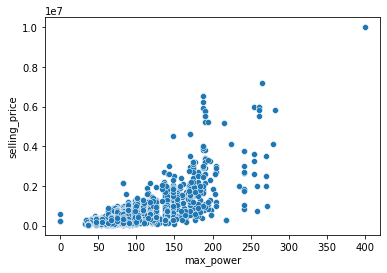

In [59]:
sns.scatterplot(data = df_train, x = df_train['max_power'], y = df_train['selling_price']);

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [60]:
import matplotlib.pyplot as plt

Для начала можно поближе посмотреть на зависимость engine_CC и max_power, можно заметить их прямопропорциональную зависимость

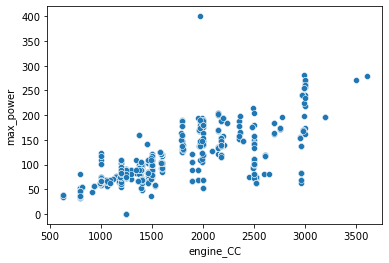

In [61]:
sns.scatterplot(data = df_train, x = 'engine_CC', y = 'max_power');

Дальше посмотрим на пробег машин в срезах по типу продавца и заметим, что даже у дилеров продавались машины с небольшим пробегом

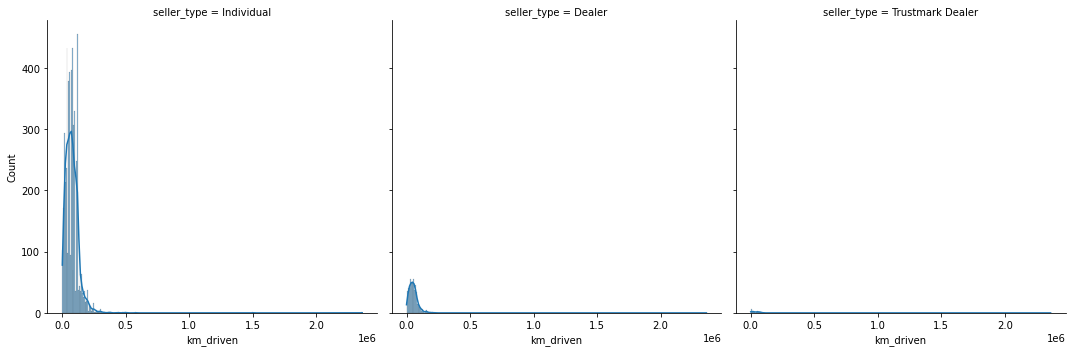

In [62]:
sns.displot(data=df_train,
            x="km_driven",
            col="seller_type",
            kde=True);

Теперь посмотрим на зависимость selling_price относительно engine_CC в разрезе типа коробки передач

Можно заметить, что у автомата больший разброс по цене, а так же , что на автоматы дилеры повышают цену в зависимости от engine_CC быстрее, чем другие продавцы

/Users/andrejurkinair/opt/anaconda3/lib/python3.9/site-packages/statsmodels/robust/robust_linear_model.py:287: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  warnings.warn('Estimated scale is 0.0 indicating that the most'
/Users/andrejurkinair/opt/anaconda3/lib/python3.9/site-packages/statsmodels/robust/robust_linear_model.py:287: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  warnings.warn('Estimated scale is 0.0 indicating that the most'
/Users/andrejurkinair/opt/anaconda3/lib/python3.9/site-packages/statsmodels/robust/robust_linear_model.py:287: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  warnings.warn('Estimated scale is 0.0 indicating that the most'


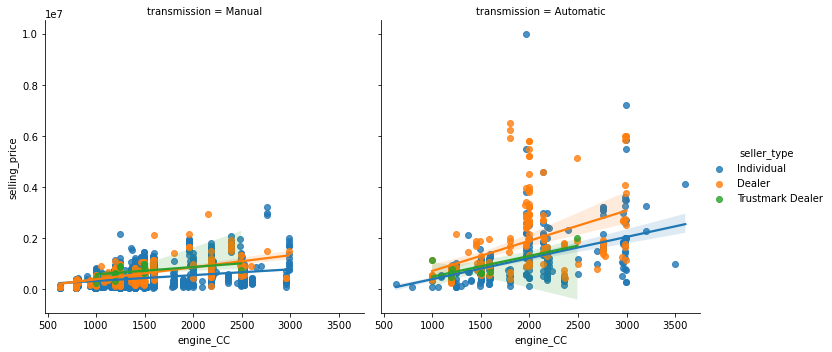

In [63]:
sns.lmplot(data=df_train,
           x="engine_CC",
           y="selling_price",
           col="transmission",
           hue = 'seller_type',
#            row = 'fuel',
           robust=True);

Важно так же посмотреть на распределение по годам, но тут в приципе все достаточно логично, чем. больше было владельцев, тем в среднем старше машина

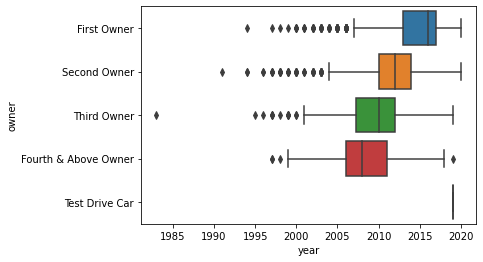

In [64]:
sns.boxplot(data=df_train,
           x="year",
           y="owner");

Ну и чем машина новее, тем она дороже

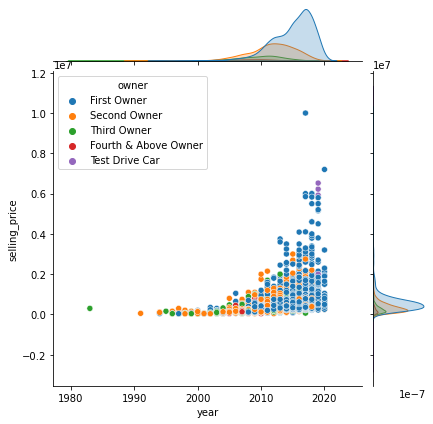

In [65]:
sns.jointplot(data=df_train, x="year", y="selling_price", hue="owner");

Обратим вниамние на тип топлива, расход в среднеи одинаковый, но у CNG топлива наибольший

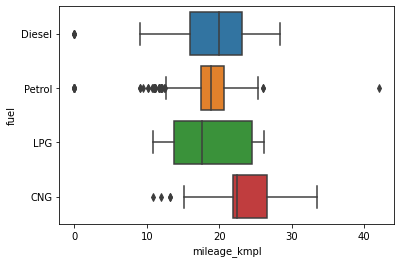

In [66]:
sns.boxplot(data=df_train,
           x="mileage_kmpl",
           y="fuel");

При этом дизельные автомобили обладали наибольшим литражом двигателя

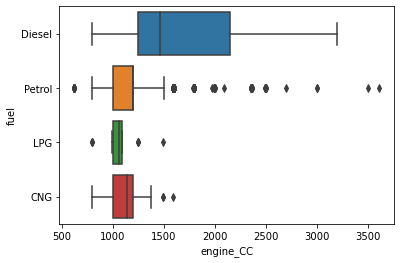

In [67]:
sns.boxplot(data=df_train,
           x="engine_CC",
           y="fuel");

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [68]:
df_train.shape

(5840, 14)

In [69]:
df_train.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,seats,mileage_kmpl,engine_CC,torque_new,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,74.00,5,23.40,1248,190.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,103.52,5,21.14,1498,250.0,2500.0


In [70]:
df_train.drop(columns=['name', 'fuel', 'selling_price', 'seller_type', 'transmission', 'owner']).shape

(5840, 8)

Из-за того, что я не удалял столбец torque, а разбил его на 2, то поменяю асерт

In [71]:
y_train = df_train['selling_price']
X_train = df_train.drop(columns=['name', 'fuel', 'selling_price', 'seller_type', 'transmission', 'owner'])

In [72]:
assert X_train.shape == (5840, 8)

In [73]:
y_test = df_test['selling_price']
X_test = df_test.drop(columns=['name', 'fuel', 'selling_price', 'seller_type', 'transmission', 'owner'])

In [74]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here

In [76]:
model = LinearRegression()

model.fit(X_train, y_train)

prediction = model.predict(X_test)
pred = model.predict(X_train)

print(f"MSE = {MSE(y_test, prediction)}, RMSE = {MSE(y_test, prediction)**0.5}")
print(f"R^2 на train = {r2_score(y_train, pred)}")
print(f"R^2 на test = {r2_score(y_test, prediction)}")

MSE = 229801481506.30917, RMSE = 479376.13781487825
R^2 на train = 0.6011082845148341
R^2 на test = 0.6002260513118112


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [77]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()

X_train_norm_np = norm.fit_transform(X_train)
X_train_norm = pd.DataFrame(data = X_train_norm_np)

X_test_norm_np = norm.fit_transform(X_test)
X_test_norm = pd.DataFrame(data = X_test_norm_np)

model = LinearRegression()

model.fit(X_train_norm, y_train)

prediction = model.predict(X_test_norm)
pred = model.predict(X_train_norm)

print(f"MSE = {MSE(y_test, prediction)}, RMSE = {MSE(y_test, prediction)**0.5}")
print(f"R^2 на train = {r2_score(y_train, pred)}")
print(f"R^2 на test = {r2_score(y_test, prediction)}")

MSE = 245166215270.95813, RMSE = 495142.62114158395
R^2 на train = 0.6011082845148327
R^2 на test = 0.5734968054976678


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [78]:
pd.DataFrame(sorted(list(zip(X_train.columns, model.coef_)),
       key=lambda x: abs(x[1]),
       reverse=True), columns=['feature', 'coef'])

,feature,coef
0,max_power,328184.519750
1,year,165330.583292
2,max_torque_rpm,-57741.674541
3,km_driven,-48645.055804
4,seats,-29887.293403
5,engine_CC,23269.207665
6,torque_new,10498.955778
7,mileage_kmpl,-7428.749216


Признак ```max_power``` оказался самым информативным в предсказании цены

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [79]:
from sklearn.linear_model import Lasso

model_l1 = Lasso(alpha=1)
model_l1.fit(X_train_norm, y_train)

prediction_l1 = model_l1.predict(X_test_norm)
pred_l1 = model_l1.predict(X_train_norm)

print(f"MSE = {MSE(y_test, prediction_l1)}, RMSE = {MSE(y_test, prediction_l1)**0.5}")
print(f"R^2 на train = {r2_score(y_train, pred_l1)}")
print(f"R^2 на test = {r2_score(y_test, prediction_l1)}")

MSE = 245167041867.4595, RMSE = 495143.4558463431
R^2 на train = 0.6011082844708086
R^2 на test = 0.5734953675097786


In [80]:
pd.DataFrame(sorted(list(zip(X_train.columns, model_l1.coef_)),
       key=lambda x: abs(x[1]),
       reverse=True), columns=['feature', 'coef'])

,feature,coef
0,max_power,328185.853643
1,year,165328.591924
2,max_torque_rpm,-57739.681939
3,km_driven,-48644.090771
4,seats,-29883.442137
5,engine_CC,23267.013933
6,torque_new,10498.406780
7,mileage_kmpl,-7425.781614


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

aplpha маловата

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [81]:
from sklearn.model_selection import GridSearchCV

lasso_params = {'alpha':[0.1, 1, 10, 100, 1000, 10000]}

model_l1_GS = GridSearchCV(Lasso(),
                           param_grid=lasso_params,
                          cv = 10)
model_l1_GS.fit(X_train_norm, y_train)

model_l1_GS.best_estimator_

Lasso(alpha=10000)

In [82]:
prediction_l1_GS = model_l1_GS.best_estimator_.predict(X_test_norm)
pred_l1_GS = model_l1_GS.best_estimator_.predict(X_train_norm)

print(f"MSE = {MSE(y_test, prediction_l1_GS)}, RMSE = {MSE(y_test, prediction_l1_GS)**0.5}")
print(f"R^2 train = {r2_score(y_train, pred_l1_GS)}")
print(f"R^2 test = {r2_score(y_test, prediction_l1_GS)}")

MSE = 253838683029.0508, RMSE = 503824.0595972475
R^2 train = 0.598336592933381
R^2 test = 0.5584097544577966


In [83]:
pd.DataFrame(sorted(list(zip(X_train.columns, model_l1_GS.best_estimator_.coef_)),
       key=lambda x: abs(x[1]),
       reverse=True), columns=['feature', 'coef'])

,feature,coef
0,max_power,334079.057944
1,year,153896.017645
2,max_torque_rpm,-44400.259844
3,km_driven,-38901.914491
4,torque_new,5638.431207
5,seats,-317.567407
6,mileage_kmpl,0.000000
7,engine_CC,0.000000


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

- У меня было 10 фолдов, для каждого по 6 параметров ```alpha``` => грид-серч обучал 60 моделей
- ```alpha=10000``` оказался лучшим из перебранных, да он занулил параметры ```mileage_kmpl```  и ```engine_CC```

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [84]:
from sklearn.linear_model import ElasticNet
from numpy import arange


regr = ElasticNet()
regr.fit(X_train_norm, y_train)

ElasticNet()

In [85]:
prediction_elastic = regr.predict(X_test_norm)
pred_elastic = regr.predict(X_train_norm)

print(f"MSE = {MSE(y_test, prediction_elastic)}, RMSE = {MSE(y_test, prediction_elastic)**0.5}")
print(f"R^2 на train = {r2_score(y_train, pred_elastic)}")
print(f"R^2 на test = {r2_score(y_test, prediction_elastic)}")

MSE = 296916027454.9908, RMSE = 544900.0160166916
R^2 на train = 0.552549710066222
R^2 на test = 0.4834702894583667


In [86]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold

alphas = [0.0, 0.1, 1.0, 10.0, 100.0]
l1_ratio = arange(0, 1, 0.1)

model_elastic_cv = ElasticNetCV(l1_ratio=l1_ratio, alphas=alphas, cv=10)
model_elastic_cv.fit(X_train_norm, y_train)


/Users/andrejurkinair/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrejurkinair/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 616847823592934.2, tolerance: 124693338888.66309
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrejurkinair/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrejurkinair/opt/anaconda3/lib/python3.9/

ElasticNetCV(alphas=[0.0, 0.1, 1.0, 10.0, 100.0], cv=10,
             l1_ratio=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))

In [87]:
print(f"alpha_ = {model_elastic_cv.alpha_}")
print(f"l1_ratio = {model_elastic_cv.l1_ratio_}")

alpha_ = 0.1
l1_ratio = 0.9


In [88]:
regr = ElasticNet(alpha = 0.1, l1_ratio = 0.9)
regr.fit(X_train_norm, y_train)

prediction_elastic = regr.predict(X_test_norm)
pred_elastic = regr.predict(X_train_norm)

print(f"MSE = {MSE(y_test, prediction_elastic)}, RMSE = {MSE(y_test, prediction_elastic)**0.5}")
print(f"R^2 на train = {r2_score(y_train, pred_elastic)}")
print(f"R^2 на test = {r2_score(y_test, prediction_elastic)}")

MSE = 246387048035.74857, RMSE = 496373.8994304078
R^2 на train = 0.6010224757800824
R^2 на test = 0.5713729848335491


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

```alpha``` = 0.1 и ```l1_ratio``` = 0.9

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [89]:
df_train.shape

(5840, 14)

In [90]:
X_train_cat = df_train.drop(columns=['name', 'selling_price'])
X_test_cat = df_test.drop(columns=['name', 'selling_price'])

In [91]:
assert X_train_cat.shape == (5840, 12)

In [92]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [93]:
# from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
# относительно fuel_CNG
# относительно seller_Dealer
# относительно trans_Automatic
# относительно First Owner
# относительно seats_2

In [94]:
X_train_cat_new = pd.get_dummies(X_train_cat, columns=['fuel', 'seller_type',
                                      'transmission', 'owner',
                                     'seats'], drop_first= True )
X_test_cat_new = pd.get_dummies(X_test_cat, columns=['fuel', 'seller_type',
                                      'transmission', 'owner',
                                     'seats'], drop_first= True )

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [95]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': arange(0.0, 100, 0.5)}

model_ridge_GS = GridSearchCV(Ridge(),
                             param_grid=ridge_params,
                             cv = 10)

model_ridge_GS.fit(X_train_cat_new, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5,...
       60.5, 61. , 61.5, 62. , 62.5, 63. , 63.5, 64. , 64.5, 65. , 65.5,
       66. , 66.5, 67. , 67.5, 68. , 68.5, 69. , 69.5, 70. , 70.5, 71. ,
       71.5, 72. , 72.5, 73. , 73.5, 74. , 74.5, 75. , 75.5, 76. , 76.5,
       77. , 77.5, 78. , 78.5, 79. , 79.5, 80. , 80.5, 81. , 81.5, 82. ,
       82.5, 83. , 83.5, 84. , 84.5, 85. , 85.5, 86. , 86.5, 87. , 87.5,
       88. , 88.5, 89. , 89.5, 90. , 90.5, 91. , 91.5, 92. , 92.5, 93. ,
       93.5, 94. , 94.5, 95. , 95.5, 96. , 96.5, 97. , 97.5, 98. , 98.5,
       99. , 99.5])})

In [96]:
X_train_cat_new.head()

,year,km_driven,max_power,mileage_kmpl,engine_CC,torque_new,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,74.00,23.40,1248,190.00,2000.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2014,120000,103.52,21.14,1498,250.00,2500.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2010,127000,90.00,23.00,1396,219.67,2750.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2007,120000,88.20,16.10,1298,112.78,4500.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,2017,45000,81.86,20.14,1197,113.75,4000.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [97]:
X_train_cat_new.columns 

Index(['year', 'km_driven', 'max_power', 'mileage_kmpl', 'engine_CC',
       'torque_new', 'max_torque_rpm', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner',
       'seats_4', 'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9',
       'seats_10', 'seats_14'],
      dtype='object')

In [98]:
X_test_cat_new.columns

Index(['year', 'km_driven', 'max_power', 'mileage_kmpl', 'engine_CC',
       'torque_new', 'max_torque_rpm', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner',
       'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9'],
      dtype='object')

In [99]:
X_test_cat_new['seats_4'] = 0
X_test_cat_new['seats_10'] = 0
X_test_cat_new['seats_14'] = 0

In [100]:
model_ridge_GS.best_estimator_

Ridge(alpha=7.0)

In [101]:
prediction_ridge = model_ridge_GS.best_estimator_.predict(X_test_cat_new)
pred_ridge = model_ridge_GS.best_estimator_.predict(X_train_cat_new)

print(f"MSE = {MSE(y_test, prediction_l1_GS)}, RMSE = {MSE(y_test, prediction_l1_GS)**0.5}")
print(f"R^2 train = {r2_score(y_train, pred_l1_GS)}")
print(f"R^2 test = {r2_score(y_test, prediction_l1_GS)}")

MSE = 253838683029.0508, RMSE = 503824.0595972475
R^2 train = 0.598336592933381
R^2 test = 0.5584097544577966


/Users/andrejurkinair/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Понял, что брал неотнормализованные данные

In [102]:
X_train_norm_np_cat = norm.fit_transform(X_train_cat_new.iloc[:, :7])
X_train_norm_cat = pd.DataFrame(data = X_train_norm_np_cat,
                                columns= ['year', 'km_driven', 'max_power', 'mileage_kmpl',
                                          'engine_CC', 'torque_new', 'max_torque_rpm'])
XX_train = pd.concat([X_train_norm_cat, X_train_cat_new.iloc[:, 7:]], 
                  axis = 1)


X_test_norm_np_cat = norm.fit_transform(X_test_cat_new.iloc[:, :7])
X_test_norm_cat = pd.DataFrame(data = X_test_norm_np_cat,
                                columns= ['year', 'km_driven', 'max_power', 'mileage_kmpl',
                                          'engine_CC', 'torque_new', 'max_torque_rpm'])
XX_test = pd.concat([X_test_norm_cat, X_test_cat_new.iloc[:, 7:]], 
                  axis = 1)

In [103]:
XX_test.head(2)

,year,km_driven,max_power,mileage_kmpl,engine_CC,torque_new,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Test Drive Car,owner_Third Owner,seats_5,seats_6,seats_7,seats_8,seats_9,seats_4,seats_10,seats_14
0,-0.917923,1.993453,0.606674,-1.351675,1.999338,0.789214,-0.993691,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.827651,-0.957314,0.506318,0.547168,0.080738,0.789214,-0.373674,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [104]:
ridge_params = {'alpha': arange(0.0, 100, 0.5)}

model_ridge_GS_02 = GridSearchCV(Ridge(),
                             param_grid=ridge_params,
                             cv = 10)

model_ridge_GS_02.fit(XX_train, y_train)
model_ridge_GS_02.best_estimator_

Ridge(alpha=8.0)

In [105]:
prediction_ridge_02 = model_ridge_GS_02.best_estimator_.predict(XX_test)
pred_ridge_02 = model_ridge_GS_02.best_estimator_.predict(XX_train)

print(f"MSE = {MSE(y_test, prediction_ridge_02)}, RMSE = {MSE(y_test, prediction_ridge_02)**0.5}")
print(f"R^2 train = {r2_score(y_train, pred_ridge_02)}")
print(f"R^2 test = {r2_score(y_test, prediction_ridge_02)}")

MSE = 335117252776.109, RMSE = 578893.1272489845
R^2 train = 0.6604280399985796
R^2 test = 0.4170135608452774


/Users/andrejurkinair/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Cтало только хуже на отнормализованных)))))

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [107]:
def to_pipeline(model, numeric, cats):
    to_numeric = Pipeline(steps=[("scaler", StandardScaler())])
    to_cats = OneHotEncoder(drop = 'first', handle_unknown="error")
    

    podg = ColumnTransformer(transformers=[("numeric", to_numeric, numeric),
                                                   ("cats", to_cats, cats),])

    punch = Pipeline(steps=[("preprocessor", podg), ("regression", model)])
    
    return punch

In [154]:
pup = to_pipeline(GridSearchCV(Ridge(),
                      param_grid = {'alpha':np.arange(0.1, 1.5, 0.1)},
                      scoring = 'r2',
                      cv = 10),
        ["year", "km_driven", 'mileage_kmpl',
                        'engine_CC', 'max_power', 'torque_new', 'max_torque_rpm'],
        ["fuel", "seller_type", "transmission", 'owner',
                        'seats']
)
pup.fit(X_train_cat, y_train)
pup.score(X_test_cat, y_test)

0.6409710564484206

Попоробуем прологарифмировать Y

In [155]:
y_train_new = np.log(y_train)
y_train_new

0       13.017003
1       12.821258
2       12.323856
3       11.775290
4       12.994530
          ...    
5835    11.695247
5836    12.468437
5837    12.676076
5838    11.813030
5839    12.853176
Name: selling_price, Length: 5840, dtype: float64

In [156]:
lup = to_pipeline(GridSearchCV(Ridge(),
                      param_grid = {'alpha':np.arange(0.1, 1.5, 0.1)},
                      scoring = 'r2',
                      cv = 10),
        ["year", "km_driven", 'mileage_kmpl',
                        'engine_CC', 'max_power', 'torque_new', 'max_torque_rpm'],
        ["fuel", "seller_type", "transmission", 'owner',
                        'seats']
)
lup.fit(X_train_cat, y_train_new)
p = np.exp(lup.predict(X_test_cat))
print(f"r2_score(y_test, p) = {r2_score(y_test, p)}")
print(f"business_metrics = {business_metrics(y_test, p)}")

r2_score(y_test, p) = 0.8180798529314941
business_metrics = 0.279


считаю приличный прирост, на большее этой ночи не хватит

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [109]:
def to_0_1(x, y):
    delta = abs(x - y)/x
    if delta>=0.1: return 0
    else: return 1

In [110]:
def business_metrics(y_true, y_pred):
    datka = pd.DataFrame()
    datka['y_true'] = y_true
    datka['y_pred'] = y_pred
    return datka.apply(lambda row: to_0_1(row["y_true"], row["y_pred"]), axis=1).sum()/len(y_true)

In [157]:
business_metrics(y_test, pup.predict(X_test_cat))

0.24

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [133]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

In [113]:
import pickle

In [163]:
inf = {'cat_names':["fuel", "seller_type", "transmission", 'owner', 'seats'],
       'num_names':["year", "km_driven", 'mileage_kmpl','engine_CC', 'max_power', 'torque_new', 'max_torque_rpm'],
       'model':pup.named_steps['regression'],
       'pr':X_train_cat.iloc[0:1], 'pipe':pup}

In [164]:
X_train_cat.iloc[0].to_json()

'{"year":2014,"km_driven":145500,"fuel":"Diesel","seller_type":"Individual","transmission":"Manual","owner":"First Owner","max_power":74.0,"seats":5,"mileage_kmpl":23.4,"engine_CC":1248,"torque_new":190.0,"max_torque_rpm":2000.0}'

In [165]:
with open('inf.pickle', 'wb') as inference:
    pickle.dump(inf, inference)

with open('inf.pickle', 'rb') as inference:
    a = pickle.load(inference)

In [166]:
r2_score(y_test, a['pipe'].predict(X_test_cat))

0.6409710564484206

In [167]:
X_test_cat.to_csv("X_test_cat.csv")

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link